<a href="https://colab.research.google.com/github/NishaMDev/Amazon-Food-Product-Sentiment-Analysis/blob/main/Food_Product_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv

df = pd.read_csv('Reviews.csv',nrows = 30000)
df.dropna()
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [2]:
df.dropna(subset=["Text"])

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
29995,29996,B000DZFMEQ,AU714FVNMGW4E,"Anita L. Burnham ""Anita B""",1,1,5,1253750400,Gluten Free Goodness,This is the best gf bread mix I have found by ...
29996,29997,B000DZFMEQ,A3CZKBRQYTW7W0,Denise Estep,1,1,5,1252713600,GLUTEN FREE BREAD,THIS BREAD MIX IS THE CLOSEST THING TO REGULAR...
29997,29998,B000DZFMEQ,A2LQTTTXBLFFAO,"lovereading ""Gin""",1,1,5,1250208000,Pamela's bread mix,Delicious and easy to make. An excellent brea...
29998,29999,B000DZFMEQ,A2A0UL2OFEIPH4,"Jo ""Jo""",1,1,5,1248048000,Great bread!,"I bought this mix for my daughter's boyfriend,..."


In [3]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline
import plotly.express as px

In [4]:
# Product Scores
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

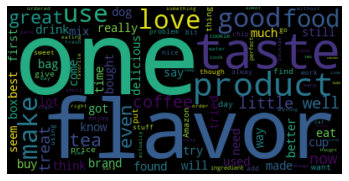

In [5]:
import nltk
#from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
#create stop words 
stopwords = set(STOPWORDS)
#stopwords = set(stopwords.words('english'))

stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)

wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png')
plt.show()

##Step 3: Classifying Tweets


In this step, we will classify reviews into “positive” and “negative,” so we can use this as training data for our sentiment classification model.

Positive reviews will be classified as +1, and negative reviews will be classified as -1.

We will classify all reviews with ‘Score’ > 3 as +1, indicating that they are positive.

All reviews with ‘Score’ < 3 will be classified as -1. Reviews with ‘Score’ = 3 will be dropped, because they are neutral. Our model will only classify positive and negative reviews.

In [6]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3

df = df[df['Score'] != 3]

df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


##Step 4: More Data Analysis

Now that we have classified tweets into positive and negative, let’s build wordclouds for each!

First, we will create two data frames — one with all the positive reviews, and another with all the negative reviews.

In [8]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

### Wordcloud — Positive Sentiment

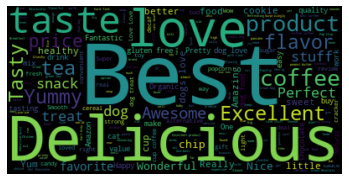

In [9]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.savefig('wordcloud2.png')
plt.axis("off")
plt.show()

###Wordcloud — Negative Sentiment

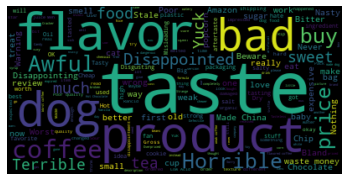

In [10]:
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud3.png')
plt.show()

As seen above, the positive sentiment word cloud was full of positive words, such as “love,” “best,” and “delicious.”

The negative sentiment word cloud was filled with mostly negative words, such as “disappointed,” and “yuck.”

The words “good” and “great” initially appeared in the negative sentiment word cloud, despite being positive words. This is probably because they were used in a negative context, such as “not good.” Due to this, I removed those two words from the word cloud.

Finaly, we can take a look at the distribution of reviews with sentiment across the dataset:

In [11]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

##Step 5: Building the Model

Finally, we can build the sentiment analysis model!

This model will take reviews in as input. It will then come up with a prediction on whether the review is positive or negative.

This is a classification task, so we will train a simple logistic regression model to do it.

###Data Cleaning

We will be using the summary data to come up with predictions. First, we need to remove all punctuation from the data.

In [12]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)


### Split the Dataframe
The new data frame should only have two columns — “Summary” (the review text data), and “sentiment” (the target variable).


In [13]:
dfNew = df[['Summary','sentiment']]
dfNew.head()

,Summary,sentiment
0,Good Quality Dog Food,1
1,Not as Advertised,-1
2,Delight says it all,1
3,Cough Medicine,-1
4,Great taffy,1


We will now split the data frame into train and test sets. 80% of the data will be used for training, and 20% will be used for testing.

In [14]:
import numpy as np
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

### Create a bag of words
Next, we will use a count vectorizer from the Scikit-learn library.

This will transform the text in our data frame into a bag of words model, which will contain a sparse matrix of integers. The number of occurrences of each word will be counted and printed.

We will need to convert the text into a bag-of-words model since the logistic regression algorithm cannot understand text.

In [15]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

### Import Logistic Regression

In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

###Split target and independent variables

In [17]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

### Fit model on data


In [18]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

### Make predictions

In [19]:
predictions = lr.predict(X_test)

We have successfully built a simple logistic regression model, and trained the data on it. We also made predictions using the model.

### Step 6: Testing
Now, we can test the accuracy of our model!

In [20]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report

new = np.asarray(y_test)

confusion_matrix(predictions,y_test)

array([[ 531,   99],
       [ 430, 4794]])

In [21]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.55      0.84      0.67       630
           1       0.98      0.92      0.95      5224

    accuracy                           0.91      5854
   macro avg       0.77      0.88      0.81      5854
weighted avg       0.93      0.91      0.92      5854



The overall accuracy of the model on the test data is around 91%, which is pretty good considering we didn’t do any feature extraction or much preprocessing.